In [ ]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 256) #Huge precision - plenty of work could be done.

#Flat space runs with 128 bits for the BigFloat, but a normal Float64 does not seem to work.
#Higher amounts of precision are needed to see all of the ringdown.

# T=Float64;

include("ScaledCosmoTimeStepExpr.jl")
include("ScaledCosmoCoeffExpr.jl")
include("ScaledCosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

In [39]:
global scaled = true;
global M = one(T);
global H = T(3);
global Om = T(4);
global tstar = T(2);
global E = exp(one(T));
global zAH = T(1/2);
global margin = 10;

In [2]:
Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1.e-20);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [21]:
using Serialization
readin=[]

open("FlatInitialCondition.dat","r") do io
    push!(readin,deserialize(io));
end

initX = readin[1][1];
inita4 = readin[1][2];
InitVar = readin[1][3];

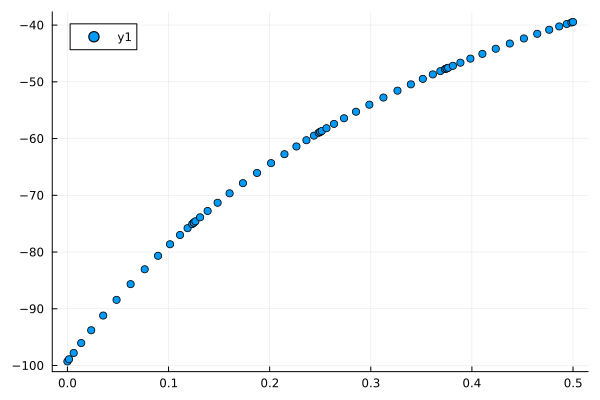

In [24]:
plt.scatter(grid,InitVar[5,:])

In [40]:
dt=.0001;
tinit = zero(T);

outfile = open("ScaledOutputA4100.bin","w");
monitorfile = open("ScaledMonitorA4100.bin","w");

VarFinal, XFinal, a4Final = Evolve(InitVar, initX, inita4, tinit , 4, dt, 10, outfile, monitorfile)

close(outfile);
close(monitorfile);

◒ time = 0.563, constraint violation = 0.003    Time: 0:48:1739m

LoadError: InterruptException: